# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Loading Data set and cheking for Outliers

In [117]:
import pandas as pd
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

df = pd.read_csv('human_body_temperature.csv')

In [124]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [125]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


###### By looking at the dataset we can observe there are no outliers

## Performing Visual Exploratory Data Analysis

In [126]:
df.describe(percentiles=[.25, .5, .75], include='all')

,temperature,gender,heart_rate
count,130.000000,130,130.000000
unique,NaN,2,NaN
top,NaN,F,NaN
freq,NaN,65,NaN
mean,98.249231,NaN,73.761538
std,0.733183,NaN,7.062077
min,96.300000,NaN,57.000000
25%,97.800000,NaN,69.000000
50%,98.300000,NaN,74.000000
75%,98.700000,NaN,79.000000


In [127]:
grouped_temp = df.groupby('gender')
grouped_temp.mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [128]:
grouped_temp.describe(percentiles=[.25, .5, .75], include='all')

heart_rate                                                     \
            count       mean       std   min   25%   50%   75%   max   
gender                                                                 
F            65.0  74.153846  8.105227  57.0  68.0  76.0  80.0  89.0   
M            65.0  73.369231  5.875184  58.0  70.0  73.0  78.0  86.0   

       temperature                                                      
             count       mean       std   min   25%   50%   75%    max  
gender                                                                  
F             65.0  98.393846  0.743488  96.4  98.0  98.4  98.8  100.8  
M             65.0  98.104615  0.698756  96.3  97.6  98.1  98.6   99.5

### Frequency distribution of Males and Females body temperature  using histogram

gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: temperature, dtype: object

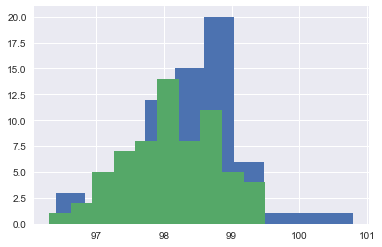

In [137]:
grouped_temp['temperature'].hist()


### Pair plot of Temperature and heart_rate

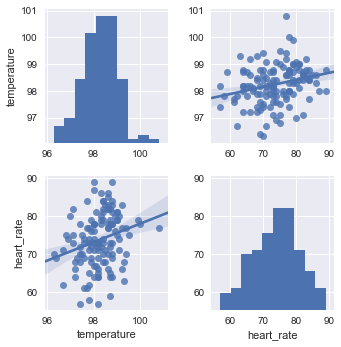

In [133]:
sns.pairplot(df, kind='reg')

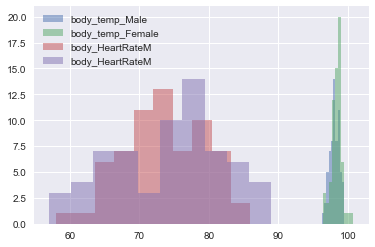

In [202]:
body_tempM = df[df['gender']=='M']['temperature']
body_tempF = df[df['gender']=='F']['temperature']

body_HeartRateM = df[df['gender']=='M']['heart_rate']
body_HeartRateF = df[df['gender']=='F']['heart_rate']

plt.hist(body_tempM, label='body_temp_Male', alpha=0.5)
plt.hist(body_tempF, label='body_temp_Female', alpha=0.5)
plt.hist(body_HeartRateM, label='body_HeartRateM', alpha=0.5)
plt.hist(body_HeartRateF, label='body_HeartRateM', alpha=0.5)
plt.legend(loc='best')

## Question 1: Is the distribution of body temperatures normal?

In [149]:
x=df[['temperature']]

In [163]:
df = pd.read_csv('human_body_temperature.csv')

In [151]:
stats.normaltest(x)

NormaltestResult(statistic=array([ 2.70380143]), pvalue=array([ 0.25874799]))

### Since the p-Value obtained is > 0.055 hence we can conclude that the data is normally distributed

## Visually seeing the distribution of temperature: Generate Q-Q plot with Python to test if data is normally distributed

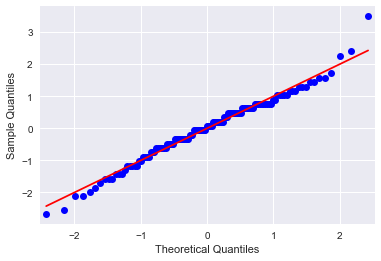

In [199]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab

X_train = pd.read_csv('human_body_temperature.csv')
X_train = X_train['temperature'].values
X_scaled = preprocessing.scale(X_train)

sm.qqplot(X_scaled, line='s')
pylab.show()

#### As we can see, our sample is almost overlapping with the theoretical distribution, hence we can conclude that our data is normalized.

# Question 2: Is the sample size large? Are the observations independent?

### Solution: If the dataset contains more than 30 observations, it cannot be considered small. 

### Chi Squared Test for Independence

In [209]:
from scipy.stats import chi2_contingency

chi2,p,dof,expected = chi2_contingency(X_train)
print("Chi Squared Value =",chi2," P-Values= ",p)

Chi Squared Value = 0.0  P-Values=  1.0


### In order to conclude that the variables are independent of each other, we need a P-Value greater than 0.05. In our case the P-value is far greater than 0.05 . Hence we conclude that the temperature variable is independent. 

# Question 3: Is the true population mean really 98.6 degrees F?

### Solution: We plot a normalized distribution using bootstrap Replicate (10000 Times) experiment to determine the Mean value of the temperature data. 

In [71]:
x=df[['temperature']]
#Convering to numpy arrays
# Format and Verify input
a = np.array(x, copy=False)
a = a.ravel()
if a.ndim == 0:
    try:
        # __index__ must return an integer by python rules.
        pop_size = operator.index(a.item())
    except TypeError:
        raise ValueError("a must be 1-dimensional or an integer")
    if pop_size <= 0:
        raise ValueError("a must be greater than 0")
elif a.ndim != 1:
    raise ValueError("a must be 1-dimensional")
else:
    pop_size = a.shape[0]
    if pop_size is 0:
        raise ValueError("a must be non-empty")

In [72]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [73]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

Mean= 98.2492307692
SEM= 0.0640566146952
standard deviation of bootstrap replicates 0.0641527862004


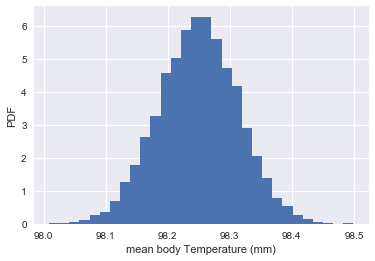

In [116]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(a,np.mean,size=10000)

#Compute Mean
mean= np.mean(a)
print('Mean=',mean)

# Compute and print SEM
sem = np.std(a) / np.sqrt(len(a))
print('SEM=',sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('standard deviation of bootstrap replicates',bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean body Temperature (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Analysis: We observe from our experiment that the mean value of body temperature comes to 98.2 F.

## Frequentist Statistical Testing

### Normality Testing

#### Here our Null Hypothesis is that our data is Normally Distributed

In [96]:
# Kolmogorov-Smirnov test for Body Temperature Of Males: Fairly conservative
ks_body_tempM = stats.kstest(body_tempM, 'norm', mode='asymp') # mode opts: 'approx'. Dist can be any in scipy.stats

# Kolmogorov-Smirnov test for Body Temperature Of Females: Fairly conservative
ks_body_tempF = stats.kstest(body_tempF, 'norm', mode='asymp') # mode opts: 'approx'. Dist can be any in scipy.stats
print("For Males Normality is=",ks_body_tempM)
print("For Females Normality is=",ks_body_tempF)

For Males Normality is= KstestResult(statistic=1.0, pvalue=6.962213679808819e-57)
For Females Normality is= KstestResult(statistic=1.0, pvalue=6.962213679808819e-57)


In [97]:
# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
nt_body_tempM = stats.normaltest(body_tempM, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'

# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
nt_body_tempF = stats.normaltest(body_tempF, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'
print("For Males Normality is=",nt_body_tempM)
print("For Females Normality is=",nt_body_tempF)

For Males Normality is= NormaltestResult(statistic=0.89119996669505031, pvalue=0.64043990745691226)
For Females Normality is= NormaltestResult(statistic=4.7354381129083993, pvalue=0.093694193898564038)


##### Since P-Value is above 0.1 hence our Null Hypothesis is true

##### ASSUMPTION:Some common statistical procedures assume that variances of the populations from which different samples are drawn are equal. Levene's test assesses this assumption. 

In [98]:
# Levene test: more robust than Bartlett if samples are non-normal. Can define what central tendency measure is used
levene_body_tempM = stats.levene(body_tempM, body_tempF, center='trimmed') # For heavy-tailed distributions
print(levene_body_tempM)

LeveneResult(statistic=1.3231358284696468, pvalue=0.25239585099878764)


##### Since P-Value is above 0.1 hence our Null Hypothesis is true

##### Our Assumption: Here we are assuming is any group different in terms of the mean and median. But for the purpose of this study we assume our Assumption is True.

## T-Tests

#### The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

In [101]:
# t-test of paired samples
ttest_body_temp = stats.ttest_rel(body_tempM, body_tempF, nan_policy='omit')
print(ttest_body_temp)

Ttest_relResult(statistic=-2.2415178256185277, pvalue=0.028467550912064203)


##### Note:A small t-score tells you that the groups are similar. A t score of -2.24 means that the groups are very unlikely to be different from each other as they are within each other. 

##### Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .02 means there is only a 2% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

###### We are not using ANOVA (Analysis Of Variance) since it requires atleast 3 groups and we have just 2 groups.

## Pearson Coefficient

In [104]:
# Pearson correlation coefficient: Parametric
pearson_Coeff = stats.pearsonr(df['temperature'], df['heart_rate'])
print(pearson_Coeff,'\n')
print('Pearson\'s correlation coefficient: ', pearson_Coeff[0])
print('p-value: ', pearson_Coeff[1]) # p-value is not so useful or reliable

(0.25365640272076417, 0.003591489250708233) 

Pearson's correlation coefficient:  0.253656402721
p-value:  0.00359148925071


###### It is only 3% likely that the Heart Rate and Body Temperature are co-related

## Linear Regression

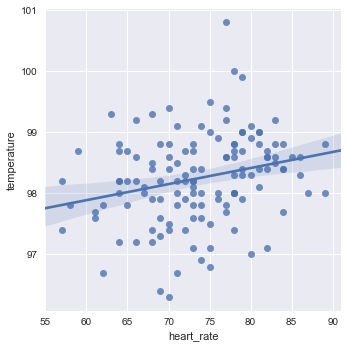

In [105]:

# Scatterplot of variables to include in regression# Scatte 
sns.lmplot(y='temperature', x='heart_rate', data=df) # Add hue='Type' to observe subgroups

In [106]:
# Scipy linear regression using least-squares. Only works for univariate
scipy_linreg_param = stats.linregress(df['temperature'], df['heart_rate']) # order of x,y != from lmplot
print(scipy_linreg_param)

LinregressResult(slope=2.4432380386118826, intercept=-166.28471941820311, rvalue=0.25365640272076412, pvalue=0.0035914892507082374, stderr=0.82351902091442197)


## Z-Tests

##### A z-test is a statistical test used to determine whether two population means are different when the variances are known and the sample size is large. The test statistic is assumed to have a normal distribution, and nuisance parameters such as standard deviation should be known for an accurate z-test to be performed.

In [107]:
from statsmodels.stats import weightstats as stests

In [109]:
testResult=stests.ztest(df['temperature'],value=3.3)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")

p-value is: 0.0



### In our case this test is not very suitable since our sample is not too large

## Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

### P-Test

In [110]:
random_sample=df.sample(10)

In [113]:
# t-test of paired samples
random_sample_ttest_body_temp = stats.ttest_rel(df['temperature'], df['heart_rate'] , nan_policy='omit')
print(random_sample_ttest_body_temp)

Ttest_relResult(statistic=40.390529098128077, pvalue=4.5004194906093815e-75)


### Z-Tests

In [114]:
testResult=stests.ztest(random_sample['temperature'],value=3.3)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")

p-value is: 0.0



##### Since the sample size is very small, P-Test is more suitable in this case.

## Question 5: At what temperature should we consider someone's temperature to be "abnormal"? : 95% Confidence Interval

In [115]:
np.percentile(df['temperature'],[2.5,97.5])

array([ 96.7225,  99.4775])

In [214]:
import random
import math

np.random.seed(10)

X_train = pd.read_csv('human_body_temperature.csv')
X_train = X_train['temperature'].values

sample_size = 1000
sample = np.random.choice(a= X_train, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = X_train.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

#confidence_interval = (sample_mean - margin_of_error,
#                       sample_mean + margin_of_error)  

confidence_interval = np.percentile(X_train, [2.5,97.5])

print("Margin of Error:")
print(margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.95996398454
Margin of Error:
0.045267212317
Confidence interval:
[ 96.7225  99.4775]


## Analysis: Any value outside the range [96.7225,99.4775] will be considered abnormal.

# Question 6: Is there a significant difference between males and females in normal temperature?

In [241]:
# Segregating body temperature of Male and Female gender
body_tempM = df[df['gender']=='M']['temperature']
body_tempF = df[df['gender']=='F']['temperature']

# Calculating the mean body temperature of Male and Female gender
body_tempM_arr = body_tempM.values
body_tempF_arr = body_tempF.values


### Null Hypothesis H0: We assume that the distribution of data values for body temperature of male and female are same and the difference between their body temperature (as observed above) is by chance. 

## Testing our Null Hypothesis:

In [238]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [244]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(body_tempM_arr,body_tempF_arr)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(body_tempM_arr,body_tempF_arr,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print("P-Value is =",p)

P-Value is = 0.0121


### As observed, since the observed P-Value is only 1% hence it is highly unlikely that the results of the mean difference between the temperature that we had observed was by chance.